# Loan Application Status Prediction

In this project we will predict the loan application status, whether the loan application is approved or not.

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the data set

In [245]:
df=pd.read_csv("C:/Users/yn/Desktop/Yuvi/DataTrained/EvaluationProjects/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [246]:
df.shape

(614, 13)

We have 614 rows and 13 columns in our data set.

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We hve 8 Object type data and 4 float and 1 int type data features.

In [248]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. The above stats shows that we have missing values in LoanAmount,Loan_Amount_Term and Credit_History features.

In [249]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have missing values in Gender, Married, Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History.

## Exploratory Data Analysis

Let's drop Loan_ID as its a nominal feature and does not help us to predict the target.

In [250]:
df.drop('Loan_ID',axis=1,inplace=True)

In [251]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We have 422 records with Loan status 'Y' and 192 records with loan status 'N'. It shows that we have imbalance data in our classification categories. 

In [252]:
categorical_features=[]
continous_features=[]
for col in df.columns:
    if df[col].dtype=='object':
        categorical_features.append(col)
    else:
        continous_features.append(col)
print(categorical_features)
print(continous_features)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [253]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Credit_History feature is categorical feature.So lets add 'Credit_History' to categorical_features list.

continous_features.remove('Credit_History')
categorical_features.append('Credit_History')

### Data Visualization

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

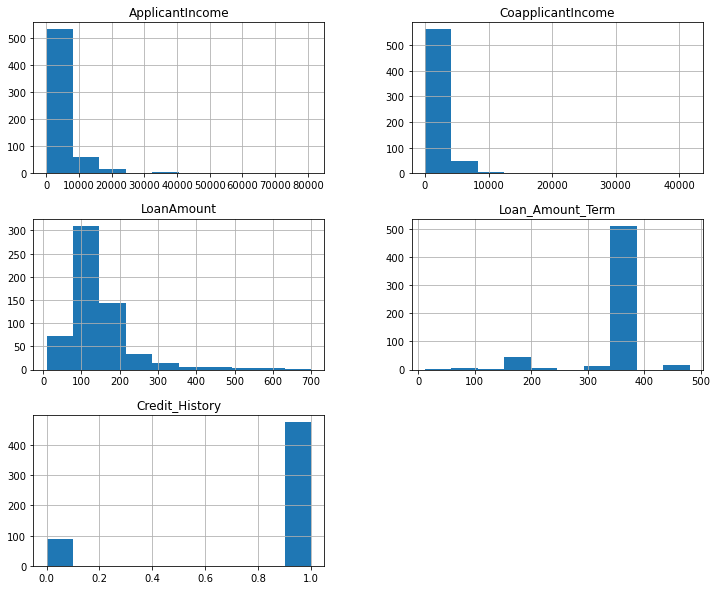

In [254]:
df.hist(figsize=(12,10))

Looks like the continous data features are not normally distributed.

### Univariate Analysis

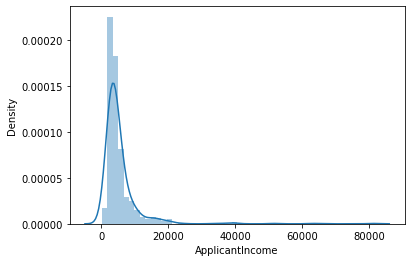

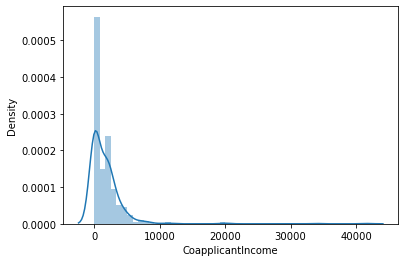

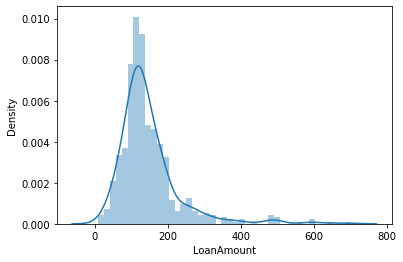

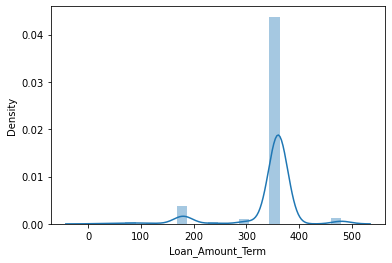

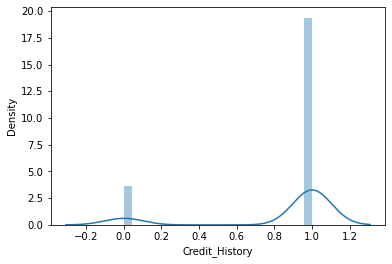

In [255]:
for feature in continous_features:
    sns.distplot(df[feature])
    plt.show()

Observations from above plots:
1. It clearly shows that all the continous features are not normally distributed.
2. We have skewness in all the continous features.

Male      489
Female    112
Name: Gender, dtype: int64


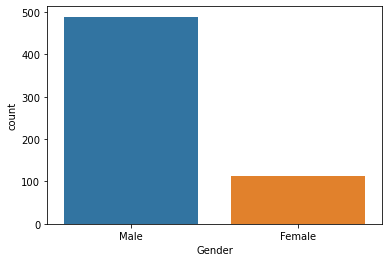

Yes    398
No     213
Name: Married, dtype: int64


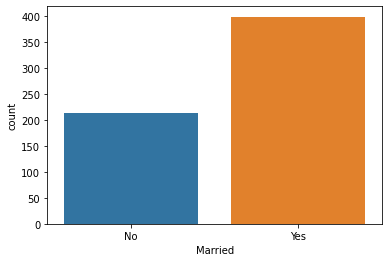

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


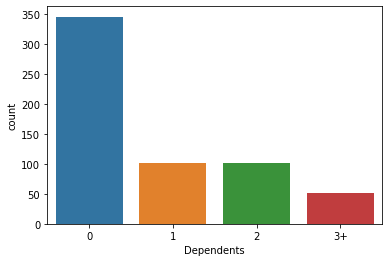

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


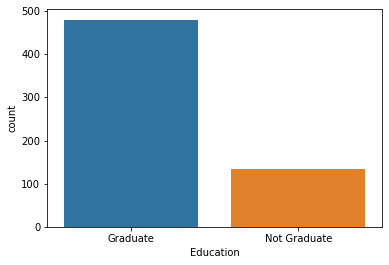

No     500
Yes     82
Name: Self_Employed, dtype: int64


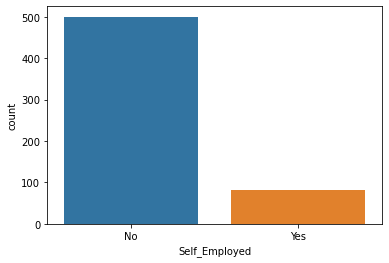

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


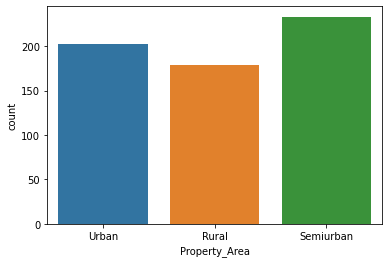

Y    422
N    192
Name: Loan_Status, dtype: int64


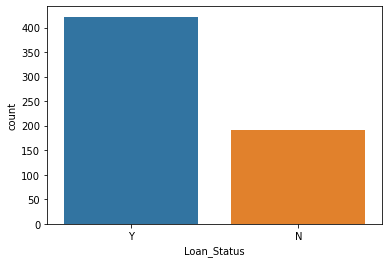

In [256]:
for feature in categorical_features:
    print(df[feature].value_counts())
    sns.countplot(df[feature])
    plt.show()

Observations from above plots:
1. We have more male applicants than female applicants.
2. 398 applicants are married and 213 are not married.
3. We have applicants with 0 dependents are more than applicants with dependents.
4. Most of the applicants are graduates.
5. We have very less applicants who are self-employed.
6. We have applicants from Semiurban,Urban and Rural areas. Applicants from SemiUrban area are little more than other areas.
7. Loan status is our target varible, which has imbalanced to to be handled.

### Bivariate Analysis

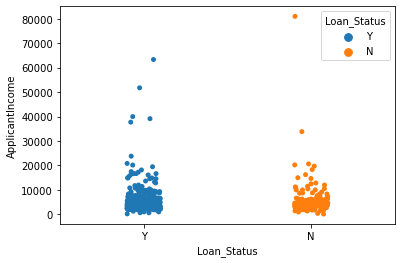

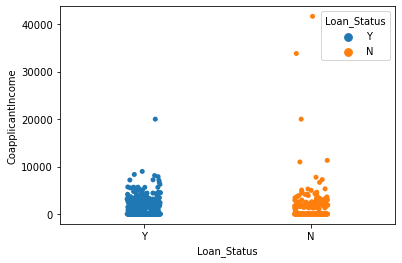

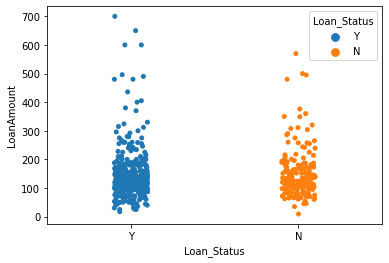

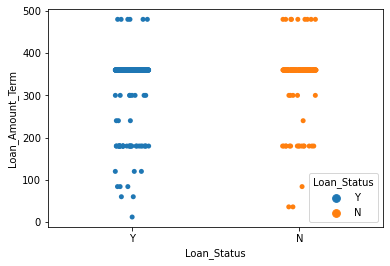

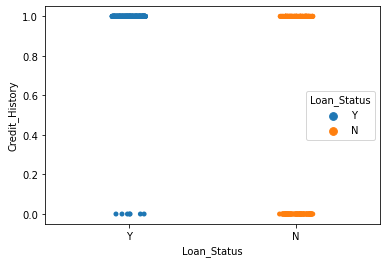

In [257]:
for feature in continous_features:
    sns.stripplot(df['Loan_Status'],df[feature],hue=df['Loan_Status'])
    plt.show()

Observations from above plots:
1. When the Loan Amount Term is less, the possibility of approving the loan is high.
2. When the credit history is 0, then the possibility of rejecting the loan is high.

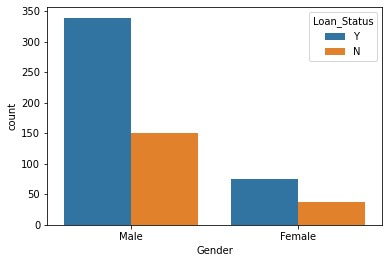

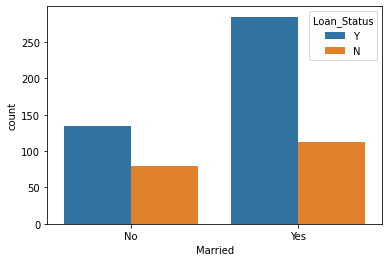

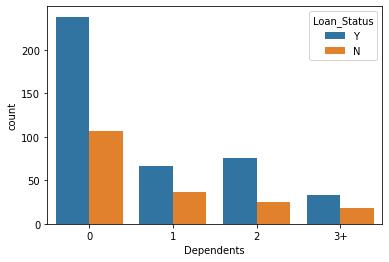

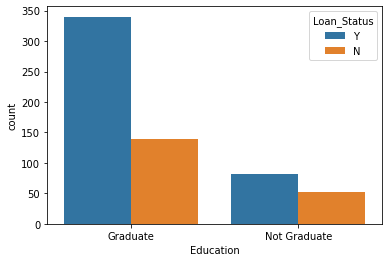

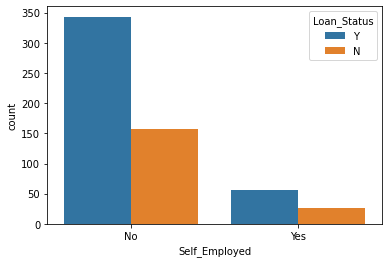

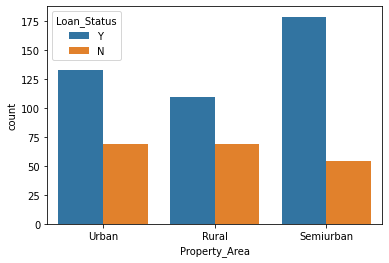

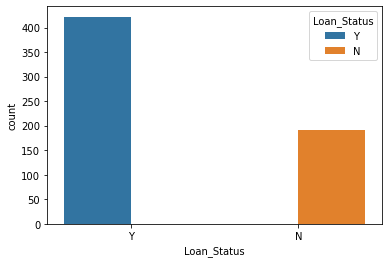

In [258]:
for feature in categorical_features:
    sns.countplot(df[feature],hue=df['Loan_Status'])
    plt.show()

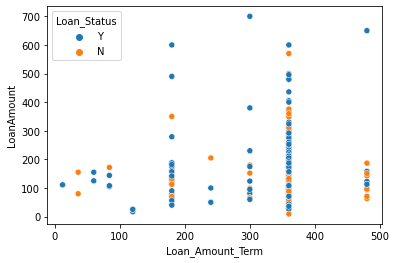

In [259]:
sns.scatterplot(df['Loan_Amount_Term'],df['LoanAmount'],hue=df['Loan_Status'])
plt.show()

From the above plot we can observe that, possibility of rejecting the loan status is high when the loan amount is less and the loan amount term is high.

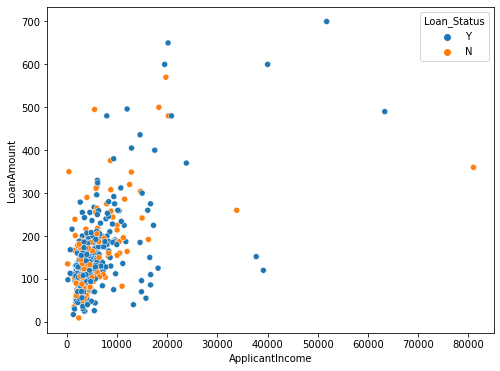

In [260]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status'])
plt.show()

From the above plot we can see that, the possibility of loan approval status is less when the applicant income is less than 10000.

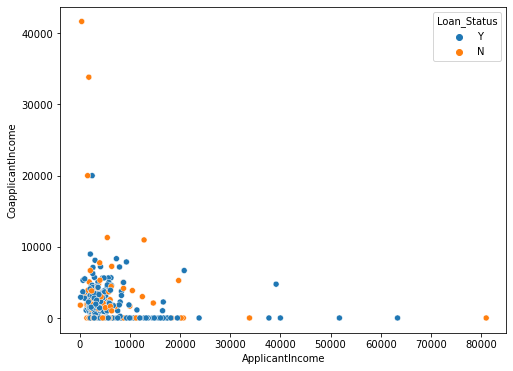

In [261]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['ApplicantIncome'],df['CoapplicantIncome'],hue=df['Loan_Status'])
plt.show()

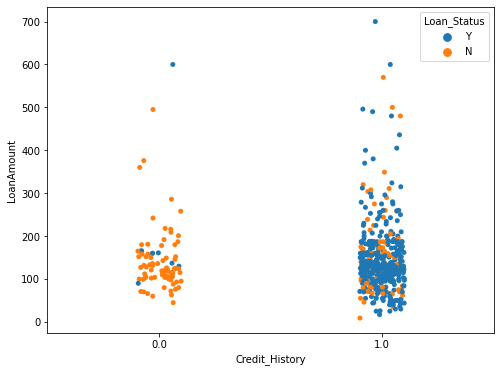

In [262]:
plt.figure(figsize=(8,6))
sns.stripplot(df['Credit_History'],df['LoanAmount'],hue=df['Loan_Status'])
plt.show()

From the above plot, it clearly shows that when the credit history is 0, the loan amount is getting rejected modtly.

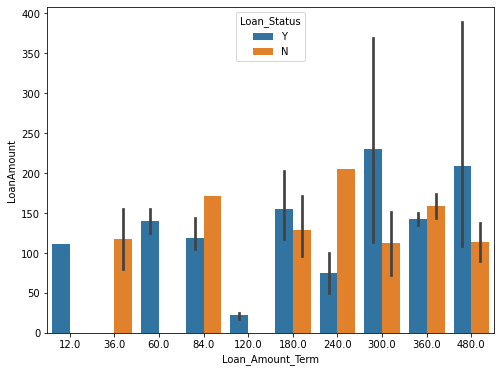

In [263]:
plt.figure(figsize=(8,6))
sns.barplot(df['Loan_Amount_Term'],df['LoanAmount'],hue=df['Loan_Status'])
plt.show()

From the above plot we can observe that most of the applicants opt for 300 months loan term and those are most likely to be approved.

<Figure size 576x432 with 0 Axes>

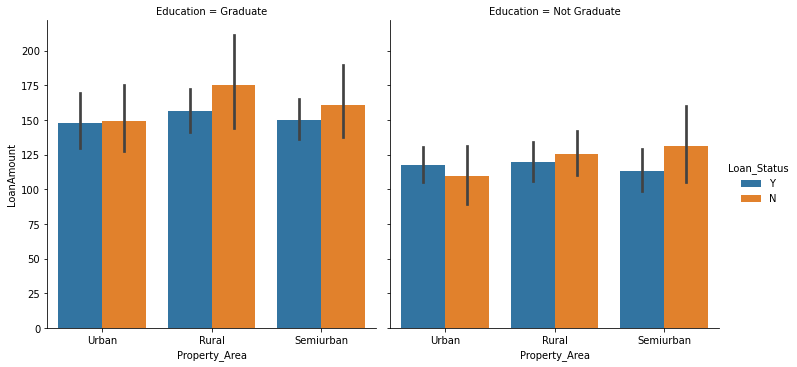

In [264]:
plt.figure(figsize=(8,6))
sns.catplot(x='Property_Area',y='LoanAmount',hue='Loan_Status',col='Education',kind='bar',data=df)
plt.show()

<Figure size 576x432 with 0 Axes>

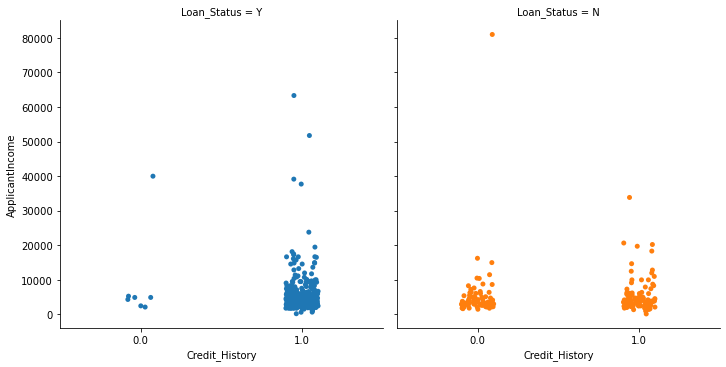

In [265]:
plt.figure(figsize=(8,6))
sns.catplot(x='Credit_History',y='ApplicantIncome',hue='Loan_Status',col='Loan_Status',kind='strip',data=df)
plt.show()

From the above plot we can see that, when the credit history is 0 and the applicant income is less than 20000, the loan status is getting rejected mostly.

<Figure size 576x432 with 0 Axes>

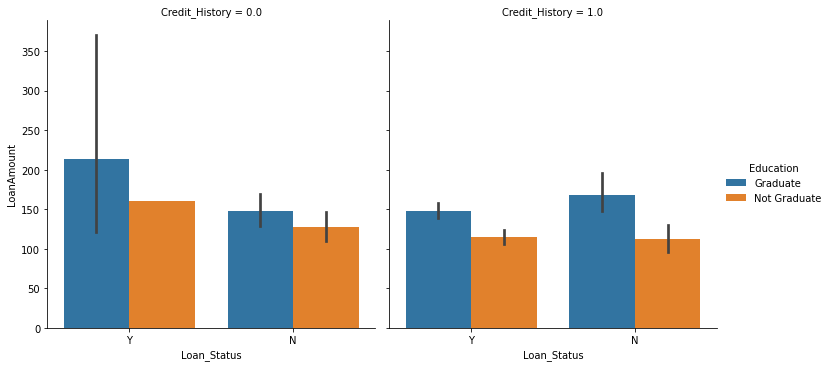

In [266]:
plt.figure(figsize=(8,6))
sns.catplot(x='Loan_Status',y='LoanAmount',hue='Education',col='Credit_History',kind='bar',data=df)
plt.show()

From the above plot we can observe that, even though the credit history is 0 and the loan amount is high, if the applicant is graduate, then the loan approval status is Yes.

<Figure size 576x432 with 0 Axes>

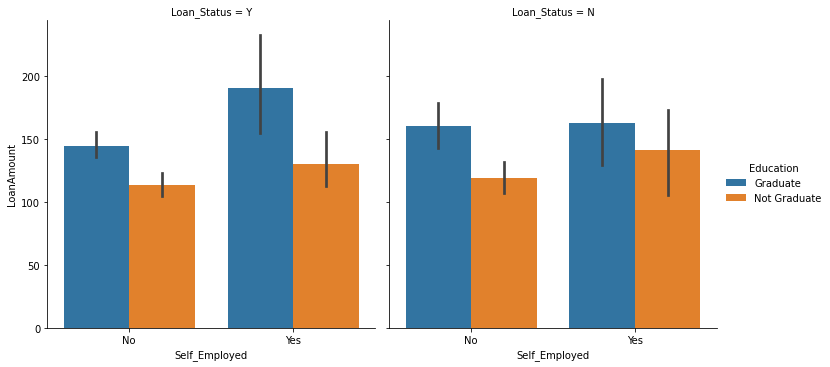

In [267]:
plt.figure(figsize=(8,6))
sns.catplot(x='Self_Employed',y='LoanAmount',hue='Education',col='Loan_Status',kind='bar',data=df)
plt.show()

From above plot we can see that when the applicant is self employed and the graduate then the loan approval possibility is high.

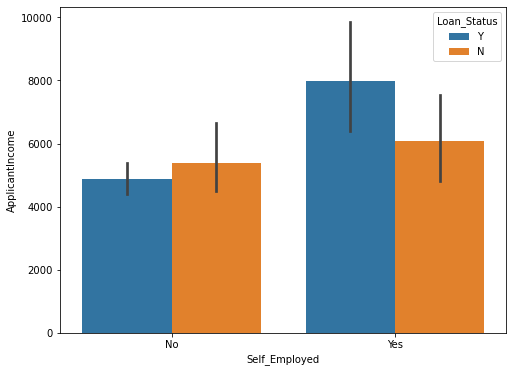

In [268]:
plt.figure(figsize=(8,6))
sns.barplot(x='Self_Employed',y='ApplicantIncome',hue='Loan_Status',data=df)
plt.show()

From the above plot we can see that, the applicants who are self-employed and their income is more, then the loan approval possiblity is high.

<Figure size 576x432 with 0 Axes>

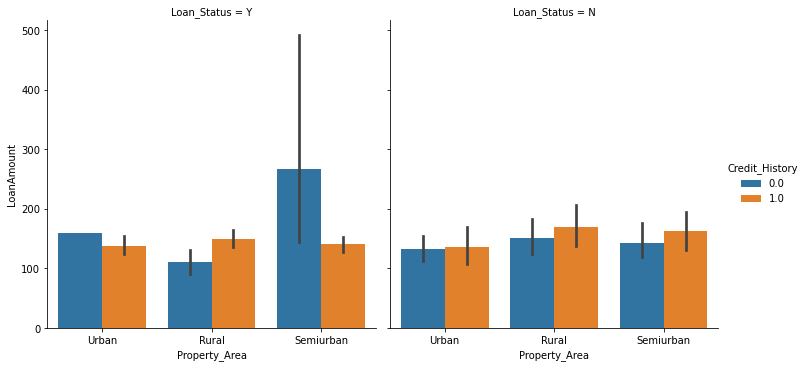

In [269]:
plt.figure(figsize=(8,6))
sns.catplot(x='Property_Area',y='LoanAmount',hue='Credit_History',col='Loan_Status',kind='bar',data=df)
plt.show()

From the above plot we can see that, When the applicant is from SemiUrban Property area, even though the credit history is 0, the loan approval status is high.

<Figure size 576x432 with 0 Axes>

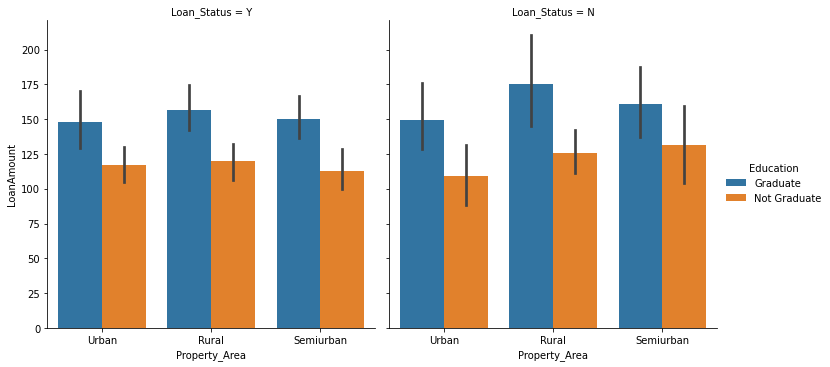

In [270]:
plt.figure(figsize=(8,6))
sns.catplot(x='Property_Area',y='LoanAmount',hue='Education',col='Loan_Status',kind='bar',data=df)
plt.show()

From the above plot we can observe that, when the applicant is not graduate and from SemiUrban and Rural property area, the loan rejection possiblinity is high.

<Figure size 576x432 with 0 Axes>

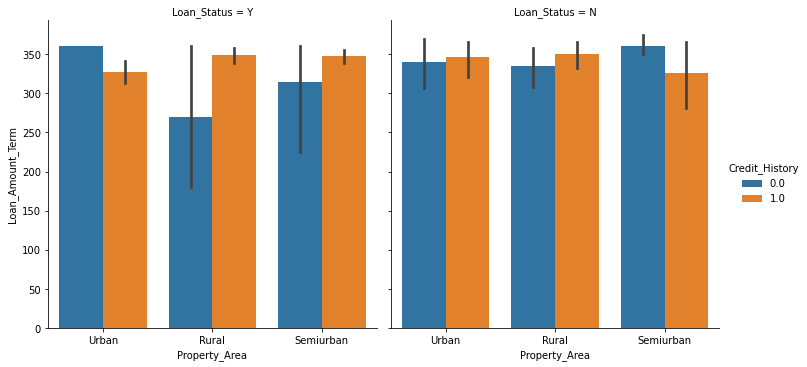

In [271]:
plt.figure(figsize=(8,6))
sns.catplot(x='Property_Area',y='Loan_Amount_Term',hue='Credit_History',col='Loan_Status',kind='bar',data=df)
plt.show()

<Figure size 576x432 with 0 Axes>

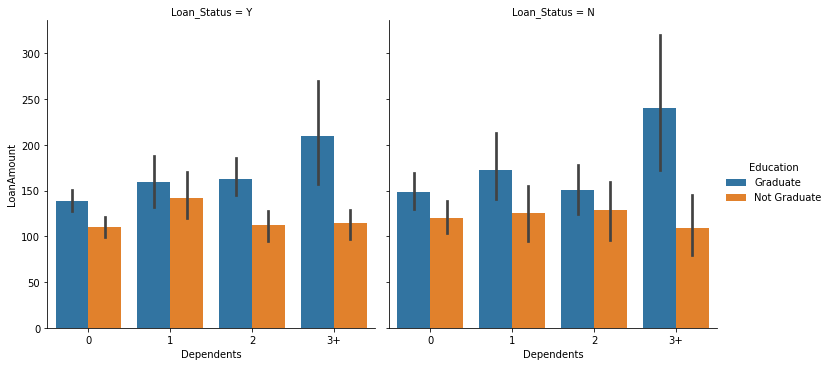

In [272]:
plt.figure(figsize=(8,6))
sns.catplot(x='Dependents',y='LoanAmount',hue='Education',col='Loan_Status',kind='bar',data=df)
plt.show()

From the above plot we can observe that, when the dependents count is more than 3, even though the applicant is graduate, the loan is getting rejected.

<Figure size 576x432 with 0 Axes>

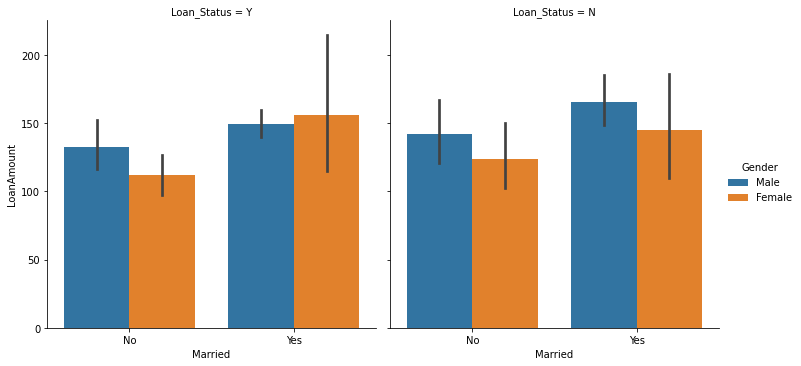

In [273]:
plt.figure(figsize=(8,6))
sns.catplot(x='Married',y='LoanAmount',hue='Gender',col='Loan_Status',kind='bar',data=df)
plt.show()

Observations from all above:
1. There are adound 70% of applicants loan are mostly getting approved and 30% are getting rejected.
2. There are more Male applicants than Female applicants, and male applicants application is getting approved mostly.
3. Most of the applicants are married and their application getting approved mostly.
4. Most of the applicants are graduate and their loans are getting approved mostly.
5. Most of the applicants applied for 300 months term, which is 25 years plan, and their loan is getting approved mostly.
6. When the loan amount term is less, most likely the loan application is getting approved.
7. Majority of the applicants does not have dependents and their loan is approved mostly
8. When the applicant is having more than 3+ dependents, their loan is getting rejected mostly.
9. Most of the applicants are from SemiUrban Area and their loan application is getting approved mostly.
10. When the applicants credit history is 0, mostly likely their application is getting rejected.

### Filling missing values

In [274]:
from sklearn.impute import SimpleImputer

In [275]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [276]:
mode_impute=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
sim_imp=SimpleImputer(strategy='most_frequent')
for i in mode_impute:
    sim_imp=sim_imp.fit(df[[i]])
    df[i]=sim_imp.transform(df[[i]])

In [277]:
sim_imp=SimpleImputer(strategy='mean')
sim_imp=sim_imp.fit(df[['LoanAmount']])
df['LoanAmount']=sim_imp.transform(df[['LoanAmount']])

In [278]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We filled all the missing values in the data set.

#### Encoding the categorical features to number type

In [279]:
from sklearn.preprocessing import LabelEncoder

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [281]:
enc_features=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for enc in enc_features:
    df[enc]=LabelEncoder().fit_transform(df[enc])

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


Now we converted all object type data to numeric data.

### Checking Multicolinearity between features

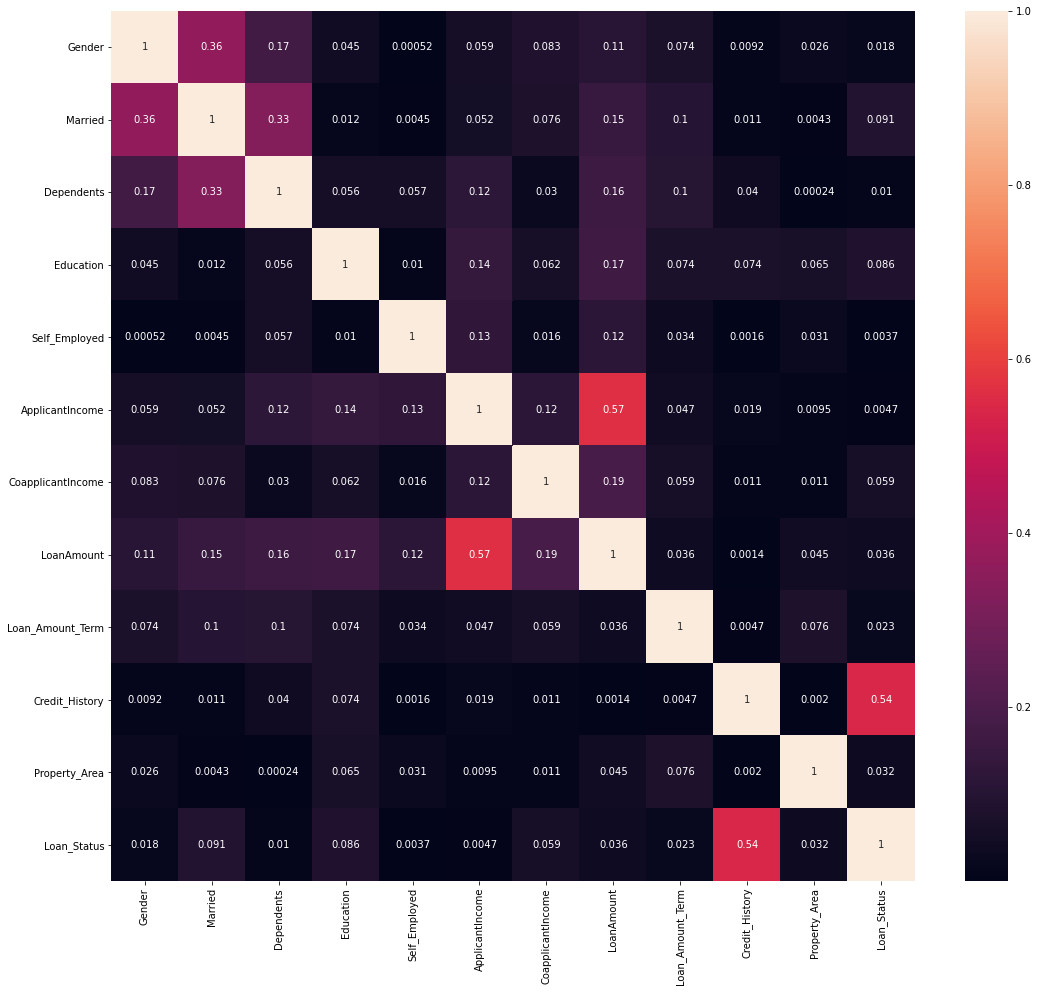

In [283]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

1. From the above plot, we could see that there is no strong correlation between the features. 
2. Credit history is 54% correlated with our target variable.
3. ApplicantIncome and Loan amount is 57% correlated with each other.

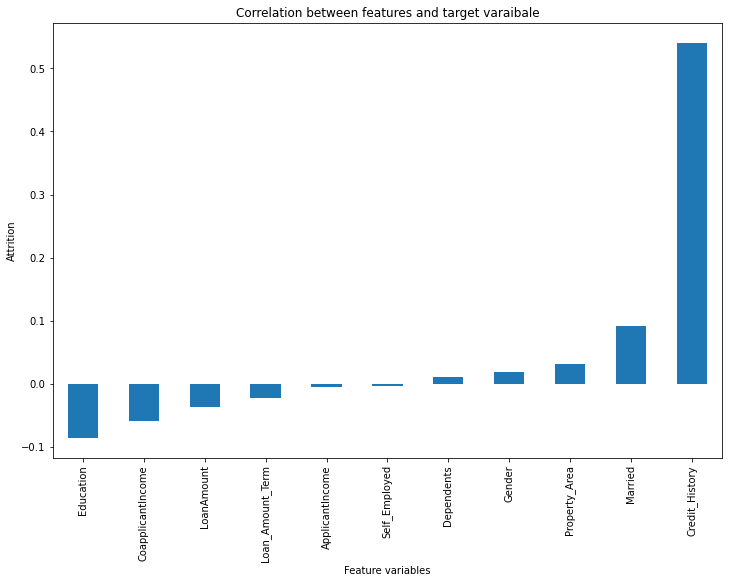

In [284]:
plt.figure(figsize=(12,8))
df.corr()['Loan_Status'].sort_values().drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('Attrition')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

### Checking Outliers

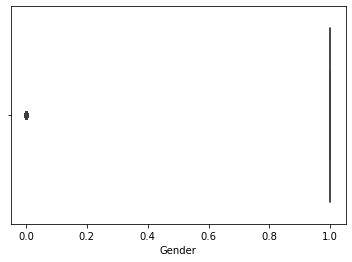

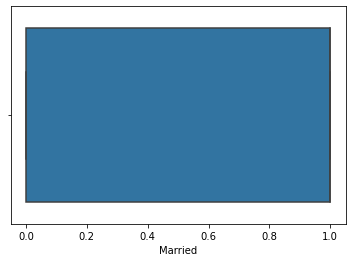

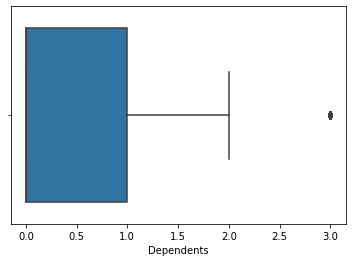

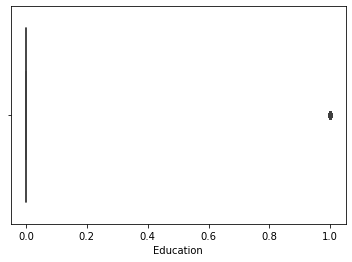

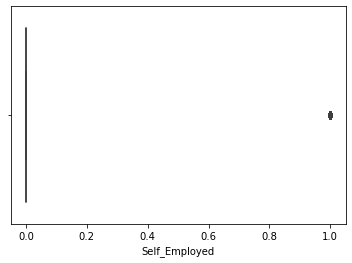

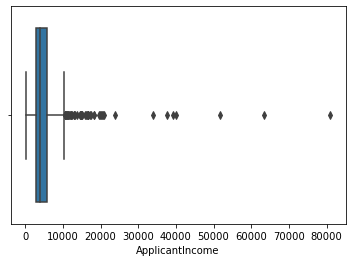

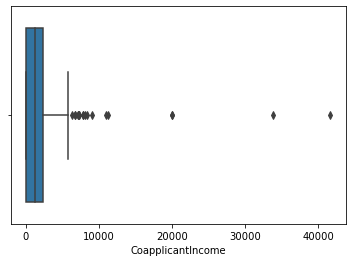

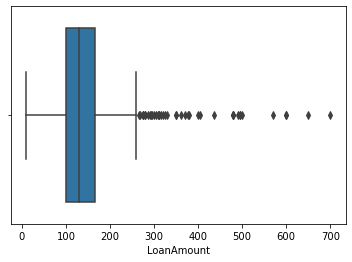

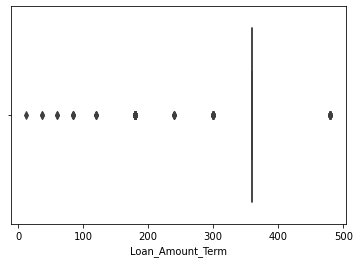

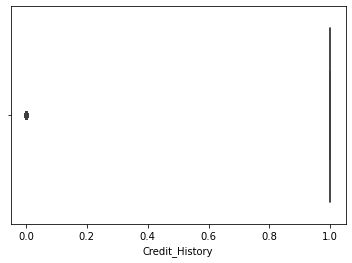

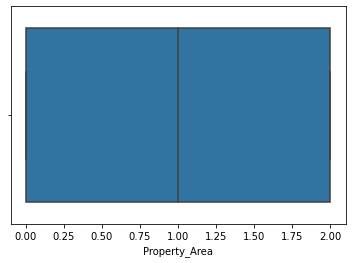

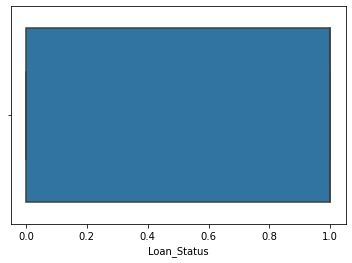

In [285]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

We have outliers in ApplicantIncome, CoapplicantIncome and LoanAmount.

In [286]:
from scipy.stats import zscore

In [287]:
score=zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
filters=(score<3).all(axis=1)
new_df=df[filters]
print(df.shape,new_df.shape)

(614, 12) (589, 12)


We have removed 25 rows by using zscore.

##### Data loss

In [288]:
d_loss=((df.shape[0]-new_df.shape[0])/df.shape[0])*100
d_loss

4.071661237785016

We lost 4% of data.

#### Checking data skewness

In [289]:
new_df.skew().sort_values()

Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Gender              -1.626104
Loan_Status         -0.828815
Married             -0.631755
Property_Area       -0.063183
Dependents           1.038787
LoanAmount           1.076221
Education            1.303332
CoapplicantIncome    1.353191
ApplicantIncome      2.164762
Self_Employed        2.218831
dtype: float64

We have skewness in continous features LoanAmount,CoapplicantIncome and ApplicantIncome.

##### Lets remove skewness using transformation

In [290]:
from sklearn.preprocessing import PowerTransformer

In [291]:
skewed_features=['LoanAmount','CoapplicantIncome','ApplicantIncome']

In [292]:
new_df[skewed_features]=PowerTransformer().fit_transform(new_df[skewed_features])

In [293]:
new_df.skew().sort_values()

Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Gender              -1.626104
Loan_Status         -0.828815
Married             -0.631755
CoapplicantIncome   -0.186195
Property_Area       -0.063183
ApplicantIncome      0.028063
LoanAmount           0.060143
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
dtype: float64

Now we do not have skewness in any of the continous features.

In [294]:
X=new_df.drop(['Loan_Status'],axis=1)
y=new_df['Loan_Status']

In [295]:
print(X.shape,y.shape)

(589, 11) (589,)


##### Lets Check multicolinearity using VIF

In [296]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [297]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
8,9.053484,Loan_Amount_Term
9,6.014701,Credit_History
0,5.998528,Gender
1,3.945410,Married
10,2.625965,Property_Area
2,1.792091,Dependents
5,1.764490,ApplicantIncome
6,1.583898,CoapplicantIncome
7,1.552742,LoanAmount
3,1.347772,Education


We culd not see any feature with high multicolinearity. Hence lets proceed with current data as it is.

## Model Buliding

In [298]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,plot_roc_curve
from sklearn.model_selection import train_test_split,cross_val_score

Lets find the best random state for splitting the train and test set.

In [299]:
X_sc=StandardScaler().fit_transform(X)

In [300]:
max_acc=0
best_rs=0
for i in range(1,100):
    lr=LogisticRegression()
    X_train,X_test,y_train,y_test = train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    acc=accuracy_score(y_test,(lr.predict(X_test)))
    if(max_acc < acc):
        max_acc=acc
        best_rs=i
print("Max accuracy: ",max_acc,"Best RS: ",best_rs)
    

Max accuracy:  0.8851351351351351 Best RS:  31


In [301]:
X_train,X_test,y_train,y_test = train_test_split(X_sc,y,test_size=0.25,random_state=31)

In [302]:
print(X_train.shape,y_train.shape)

(441, 11) (441,)


### Applying SMOTE for imbalance classifier

As we know that we have imbalanced data for our classifiers,we will apply SMOTE oversampling technique to balance the classfier data.

In [303]:
from imblearn.over_sampling import SMOTE

In [304]:
X_train_res,y_train_res=SMOTE().fit_resample(X_train,y_train)
print("Training set size before applying SMOTE: ",X_train.shape,y_train.shape)
print("Training set size after applying SMOTE:",X_train_res.shape,y_train_res.shape)

Training set size before applying SMOTE:  (441, 11) (441,)
Training set size after applying SMOTE: (592, 11) (592,)


### Building base models and model selection

In [305]:
lr=LogisticRegression()
rf_clf=RandomForestClassifier()
knn_clf=KNeighborsClassifier()
dt_clf=DecisionTreeClassifier()
gb_clf=GradientBoostingClassifier()
svc_clf=SVC()
models=[lr,rf_clf,knn_clf,dt_clf,gb_clf,svc_clf]

In [306]:
for m in models:
    m.fit(X_train_res,y_train_res)
    y_pred=m.predict(X_test)
    print('Metrics for ',m)
    print('Train Accuracy: ',m.score(X_train_res,y_train_res))
    print('Test Accuracy: ',accuracy_score(y_test,y_pred))
    print('ROC AUC Score:',roc_auc_score(y_test,y_pred))
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('Classification Report:\n',classification_report(y_test,y_pred),'\n')
    

Metrics for  LogisticRegression()
Train Accuracy:  0.7364864864864865
Test Accuracy:  0.8378378378378378
ROC AUC Score: 0.7567567567567567
Confusion Matrix:
 [[ 22  15]
 [  9 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.59      0.65        37
           1       0.87      0.92      0.89       111

    accuracy                           0.84       148
   macro avg       0.79      0.76      0.77       148
weighted avg       0.83      0.84      0.83       148
 

Metrics for  RandomForestClassifier()
Train Accuracy:  1.0
Test Accuracy:  0.831081081081081
ROC AUC Score: 0.7612612612612614
Confusion Matrix:
 [[ 23  14]
 [ 11 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        37
           1       0.88      0.90      0.89       111

    accuracy                           0.83       148
   macro avg       0.78      0.76      0.77       148
w

In [307]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
for m in models:
    print("For Model ",m)
    mean_acc=0
    for fold, (train_index, test_index) in enumerate(kf.split(X_sc,y), 1):
        X_train = X_sc[train_index]
        y_train = np.ravel(y)[train_index]
        X_test = X_sc[test_index]
        y_test = np.ravel(y)[test_index]
        sm = SMOTE(random_state=12)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)       
        m.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = m.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        mean_acc=mean_acc+acc
    print("Mean Accuracy: ",(mean_acc/5))

For Model  LogisticRegression()
Mean Accuracy:  0.7776908590467912
For Model  RandomForestClassifier()
Mean Accuracy:  0.7809358250036216
For Model  KNeighborsClassifier()
Mean Accuracy:  0.6826162538026945
For Model  DecisionTreeClassifier()
Mean Accuracy:  0.7317977690859048
For Model  GradientBoostingClassifier()
Mean Accuracy:  0.7692307692307693
For Model  SVC()
Mean Accuracy:  0.7571780385339708


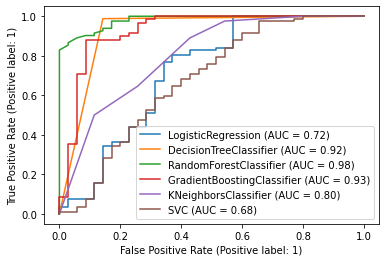

In [308]:
display=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(rf_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(gb_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(svc_clf,X_test,y_test,ax=display.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

Based on the base model score, cross validation score and roc_auc_score, RandomForestClassifier works well for our dataset.

### Final model - RandomForestClassifier

#### Hyper Parameter Tuning

In [309]:
from sklearn.model_selection import GridSearchCV

In [310]:
param={'criterion':['gini','entropy'],'max_features':["auto", "sqrt", "log2"],
      'n_estimators':[100,110,120,130],}
grd_srch=GridSearchCV(RandomForestClassifier(),param,n_jobs=-1)
grd_srch.fit(X_train_res,y_train_res)
print(grd_srch.best_estimator_)
print(grd_srch.best_score_)

RandomForestClassifier(n_estimators=120)
0.8110240706452073


In [311]:
max_accuracy=0
best_rs=0
for i in range(1,100):
    final_model=RandomForestClassifier(n_estimators=120,random_state=i)
    final_model.fit(X_train_res,y_train_res)
    y_pred=final_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(max_accuracy < acc):
        max_accuracy=acc
        best_rs=i
print("Max accuracy: ",max_accuracy,"Best RS: ",best_rs)
final_model=RandomForestClassifier(n_estimators=120,random_state=best_rs)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print('Train Accuracy: ',final_model.score(X_train_res,y_train_res))
print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('ROC AUC Score:',roc_auc_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred),'\n')

Max accuracy:  0.9829059829059829 Best RS:  8
Train Accuracy:  1.0
Test Accuracy:  0.9829059829059829
ROC AUC Score: 0.979616724738676
Confusion Matrix:
 [[34  1]
 [ 1 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.99      0.99      0.99        82

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117
 



##### We able to build a final model with 98% of accuracy and 98% of ROC AUC score.

### Saving model

In [312]:
import pickle

In [313]:
pickle.dump(final_model,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/LoanStatusPrediction.pkl','wb'))

In [314]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/LoanStatusPrediction.pkl','rb'))

In [316]:
prediction=final_model.predict(X_test)
result_table=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
result_table

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
112,1,1
113,1,1
114,0,0
115,0,0
